# Notebook to process and visualize data about law faculty salaries & gender (Toronto)

Requirements:
    
    !pip install requests
    !pip install pandas
    !pip install seaborn
    !pip install matplotlib

License: [CC BY-NC 3.0](https://creativecommons.org/licenses/by-nc/3.0/)

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and clean Sunshine List data

In [2]:
# Load sunshine list data
request = requests.get('https://www.ontario.ca/public-sector-salary-disclosure/pssd-assets/files/2021/tbs-pssd-compendium-salary-disclosed-2021-en-utf-8-2023-01-05.json')
df_sunshine = pd.read_json(request.text)

# simplify first and last names for matching
df_sunshine['last_simple'] = df_sunshine['Last Name'].str.replace('[.,]', ' ', regex=True).str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.replace('\’', ' ', regex=True).str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.replace('\'', ' ').str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.split(' ').str[-1].str.strip().str.lower()
df_sunshine['first_simple'] = df_sunshine['First Name'].str.replace('[.,]', ' ', regex=True).str.strip()
df_sunshine['first_simple'] = df_sunshine['first_simple'].str.split(' ').str[0].str.strip().str.lower()
df_sunshine

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,last_simple,first_simple
0,Colleges,Abboud,Nadim,116977.21,126.77,Algonquin College Of Applied Arts and Technology,Professor,2021,abboud,nadim
1,Colleges,Agate,Jeffrey,138280.53,392.33,Algonquin College Of Applied Arts and Technology,Associate Director Student Support Services,2021,agate,jeffrey
2,Colleges,Al Dabbah,Rayan,107206.59,21.77,Algonquin College Of Applied Arts and Technology,Professor,2021,dabbah,rayan
3,Colleges,Alexander,Doug,115377.97,126.77,Algonquin College Of Applied Arts and Technology,Professor,2021,alexander,doug
4,Colleges,Alexander,Tamra,116834.24,74.36,Algonquin College Of Applied Arts and Technology,Professor,2021,alexander,tamra
...,...,...,...,...,...,...,...,...,...,...
244451,Universities,Zikic,Jelena,239448.12,1022.64,York University,Associate Professor / Graduate Program Director,2021,zikic,jelena
244452,Universities,Zoidl,"Georg, R",232680.24,1065.36,York University,Professor,2021,zoidl,georg
244453,Universities,Zryd,Michael,176267.22,940.20,York University,Associate Professor / Graduate Program Director,2021,zryd,michael
244454,Universities,Zwick,Detlev,354142.06,1065.36,York University,Dean / Associate Professor,2021,zwick,detlev


### Load and clean faculty bios data

NOTE: to update, run scrape_bios.ipynb

In [3]:
# Load faculty bios from json
df = pd.read_json('data/all_bios.json')

# Clean data for matching with sunshine list

# rename universities to match sunshine list
universities = {
    'osgoode': 'York University',
    'u_toronto': 'University Of Toronto',
    'tmu': 'Ryerson University'
    }
df['university'] = df['faculty'].apply(lambda x: universities[x])

# simplify first and last names for matching
df['name_simple'] = df['name'].str.replace('[.,]', ' ', regex=True).str.strip()
df['name_simple'] = df['name_simple'].str.replace('’', ' ', regex = True).str.strip()
df['name_simple'] = df['name_simple'].str.replace('\'', ' ').str.strip()
df['last_name'] = df['name_simple'].apply(lambda x: x.split(' ')[-1]).str.strip().str.lower()
df['first_name'] = df['name_simple'].apply(lambda x: x.split(' ')[0]).str.strip().str.lower()
df['last_name'] = df['last_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['first_name'] = df['first_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Manual changes do to variations in names
df.loc[df['name'] == 'Jonathon Penney', 'first_name'] = 'jon'
df.loc[df['name'] == 'Jim Phillips', 'first_name'] = 'james'
df.loc[df['name'] == 'Timothy J. Bartkiw', 'first_name'] = 'tim'

print(df.university.value_counts())

df


York University          78
University Of Toronto    62
Ryerson University       21
Name: university, dtype: int64


,faculty,name,title,email,href,bio,university,name_simple,last_name,first_name
0,osgoode,Rabiat Akande,Assistant Professor,rakande@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Rabiat Akande works in the fields of...,York University,Rabiat Akande,akande,rabiat
1,osgoode,Harry Arthurs,Professor Emeritus,harthurs@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,"University Professor, former Dean of Osgoode H...",York University,Harry Arthurs,arthurs,harry
2,osgoode,Saptarishi Bandopadhyay,Associate Professor,sbandopadhyay@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,I am an Associate Professor at Osgoode Hall La...,York University,Saptarishi Bandopadhyay,bandopadhyay,saptarishi
3,osgoode,Stephanie Ben-Ishai,Professor and York University Distinguished Re...,sbenishai@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Stephanie Ben-Ishai is a Distinguish...,York University,Stephanie Ben-Ishai,ben-ishai,stephanie
4,osgoode,Benjamin L. Berger,Professor & York Research Chair in Pluralism a...,bberger@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Benjamin L. Berger is Professor and ...,York University,Benjamin L Berger,berger,benjamin
...,...,...,...,...,...,...,...,...,...,...
156,tmu,Pnina Alon-Shenker,Associate Professor,pnina.alon@torontomu.ca,https://www.torontomu.ca/law/faculty-and-resea...,Pnina Alon-Shenker is an associate professor i...,Ryerson University,Pnina Alon-Shenker,alon-shenker,pnina
157,tmu,Timothy J. Bartkiw,Associate Professor,tbartkiw@torontomu.ca,https://www.torontomu.ca/law/faculty-and-resea...,Timothy J. Bartkiw is an associate professor i...,Ryerson University,Timothy J Bartkiw,bartkiw,tim
158,tmu,Gil Lan,Associate Professor,glan@torontomu.ca,https://www.torontomu.ca/law/faculty-and-resea...,Gil Lan is an associate professor in the Linco...,Ryerson University,Gil Lan,lan,gil
159,tmu,Alexandra Orlova,Professor,aorlova@torontomu.ca,https://www.torontomu.ca/law/faculty-and-resea...,Alexandra Orlova received her PhD in law from ...,Ryerson University,Alexandra Orlova,orlova,alexandra


### Merge datasets

In [4]:
# Merge df_sunshine and df using last_name, first_name and university from df, and Employer, Last Name and First Name from df_sunshine

df_merged = df.merge(df_sunshine, left_on=['last_name', 'first_name', 'university'], right_on=['last_simple', 'first_simple', 'Employer'])

# rename university values
universities = {'York University': 'Osgoode Hall', 'University Of Toronto': 'University of Toronto', 'Ryerson University': 'Lincoln Alexander'}
df_merged['university'] = df_merged['university'].apply(lambda x: universities[x])

# change column 'Job Title' to 'title_sunshine'

df_merged = df_merged.rename(columns={'Job Title': 'Title'})

# keep only needed columns
df_merged = df_merged[['name', 'university', 'href', 'bio', 'Title', 'Salary' ]]

print(df_merged.university.value_counts())
df_merged


Osgoode Hall             55
University of Toronto    52
Lincoln Alexander        14
Name: university, dtype: int64


,name,university,href,bio,Title,Salary
0,Saptarishi Bandopadhyay,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,I am an Associate Professor at Osgoode Hall La...,Assistant Professor,139560.24
1,Stephanie Ben-Ishai,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Stephanie Ben-Ishai is a Distinguish...,Professor,248584.79
2,Benjamin L. Berger,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Benjamin L. Berger is Professor and ...,Professor,232562.47
3,Kate Glover Berger,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Kate Glover Berger joined the facult...,Assistant Professor,115342.67
4,Faisal Bhabha,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Faisal Bhabha is an Associate Professor at Osg...,Associate Professor,171136.45
...,...,...,...,...,...,...
116,Pnina Alon-Shenker,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Pnina Alon-Shenker is an associate professor i...,Associate Professor,218323.40
117,Timothy J. Bartkiw,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Timothy J. Bartkiw is an associate professor i...,Associate Professor,187631.46
118,Gil Lan,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Gil Lan is an associate professor in the Linco...,Associate Professor,174307.78
119,Alexandra Orlova,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Alexandra Orlova received her PhD in law from ...,Professor,175599.41


### Analysis of salaries of Toronto law professors

In [5]:
# get average Salary for each university in df_merged
print ('Mean Salary by University')
print(df_merged.groupby('university')['Salary'].mean())
print()
print ('Median Salary by University')
print(df_merged.groupby('university')['Salary'].median())
print()
print ('-------------------------')
print()


def get_pronouns(text):

    # Create a dictionary to keep track of the count of each pronoun
    pronoun_count = {"he": 0, "him": 0, "his": 0, "she": 0, "her": 0, "hers": 0, "they": 0, "them": 0, "theirs": 0}

    # prepare the text for analysis
    text = text.lower().split()

    # count the pronouns
    for word in text:
        if word in pronoun_count:
            pronoun_count[word] += 1

    # if no pronouns, return "other"
    if sum(pronoun_count.values()) == 0:
        return "other"

    # Get the most common pronouns
    most_common_pronoun = max(pronoun_count, key=pronoun_count.get)
    if most_common_pronoun in ["he", "him", "his"]:
        return "he/him"
    elif most_common_pronoun in ["she", "her", "hers"]:
        return "she/her"
    else:
        return "they/them"

# get pronouns for each bio using apply
df_merged['pronouns'] = df_merged['bio'].apply(get_pronouns)

# create new df with only pronouns and salary, and print value counts
df_pronouns = df_merged.copy()
print ('Pronouns used in bios')
print(df_pronouns.value_counts('pronouns'))
print()
print ('-------------------------')
print()

# Remove 'other' because this means no pronouns used in bio (e.g. first person or bio missing)
df_pronouns = df_pronouns[df_pronouns['pronouns'] != 'other']

# Note: No they/them pronouns used in any bios

# get mean and median salary for each pronoun
print('Mean Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].mean())
print()
print ('Median Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].median())
print()
print ('-------------------------')
print()

# get median salary for each pronoun, per university 
print('Mean Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].mean())
print()
print('Median Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].median())




Mean Salary by University
university
Lincoln Alexander        177123.845714
Osgoode Hall             208585.456364
University of Toronto    248598.171731
Name: Salary, dtype: float64

Median Salary by University
university
Lincoln Alexander        174953.595
Osgoode Hall             209695.770
University of Toronto    240436.975
Name: Salary, dtype: float64

-------------------------

Pronouns used in bios
pronouns
he/him     62
she/her    57
other       2
dtype: int64

-------------------------

Mean Salary by Pronouns
pronouns
he/him     229750.853710
she/her    216321.293333
Name: Salary, dtype: float64

Median Salary by Pronouns
pronouns
he/him     210092.985
she/her    218815.440
Name: Salary, dtype: float64

-------------------------

Mean Salary by Pronouns and University
university             pronouns
Lincoln Alexander      he/him      175398.265000
                       she/her     178418.031250
Osgoode Hall           he/him      213979.334348
                       she/her 

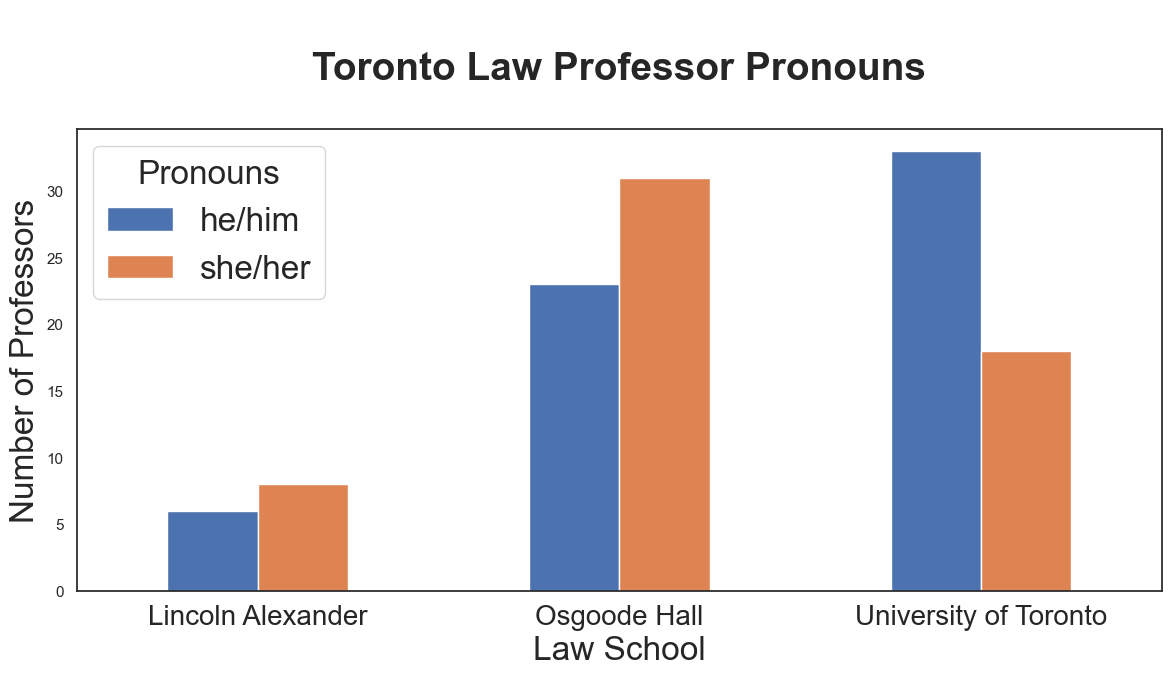

In [6]:
# bar chart with the number of professors with each pronoun, broken down by university
sns.set_palette('husl')
sns.set_theme(style="white")
df_pronouns.value_counts(['university', 'pronouns']).unstack().plot(kind='bar', stacked=False)
plt.xlabel('Law School', fontsize=24)
plt.ylabel('Number of Professors', fontsize=24)
plt.xticks(rotation=0, ha='center', fontsize=20)
plt.gcf().set_size_inches(14, 6)
plt.title('\nToronto Law Professor Pronouns\n', fontweight='bold', fontsize=28)
plt.legend(title='Pronouns', fontsize=24, title_fontsize=24)
plt.show()

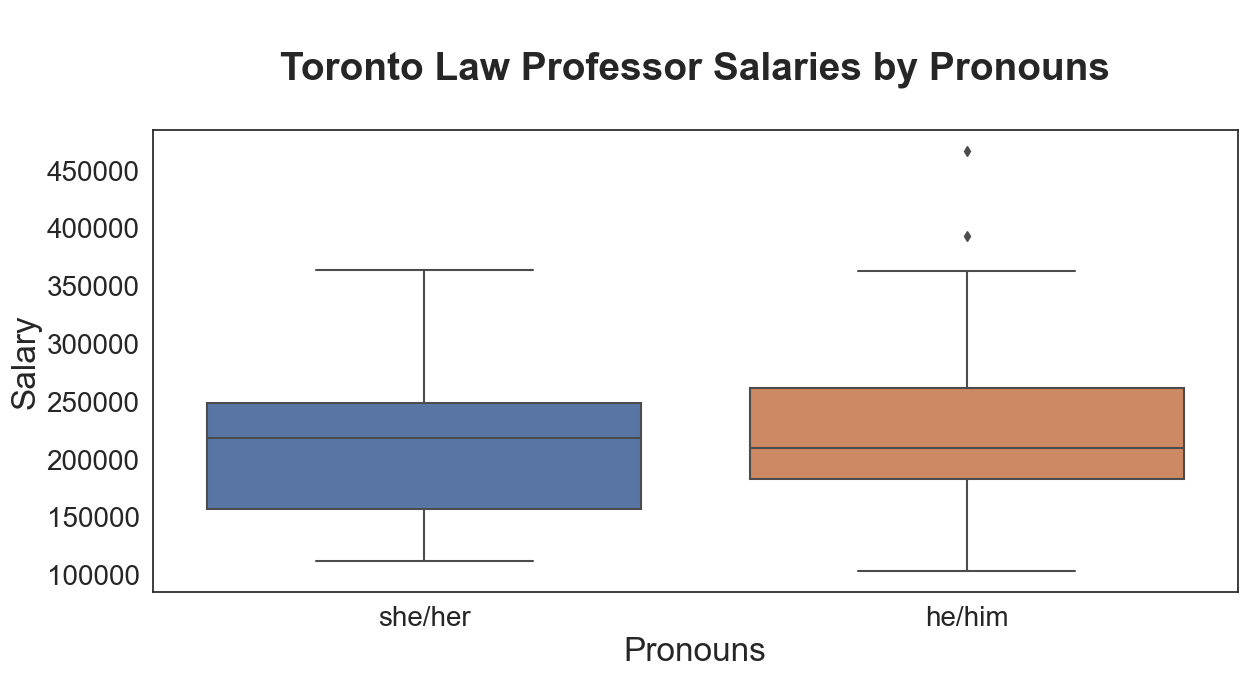

In [7]:
# graph the distribution of salaries for each pronoun
sns.set_palette('husl')
sns.set_theme(style="white")
ax = sns.boxplot(x="pronouns", y="Salary", data=df_pronouns)
ax.set_title('\nToronto Law Professor Salaries by Pronouns\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Pronouns', fontsize=24)
ax.set_ylabel('Salary', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(14, 6)
plt.show()

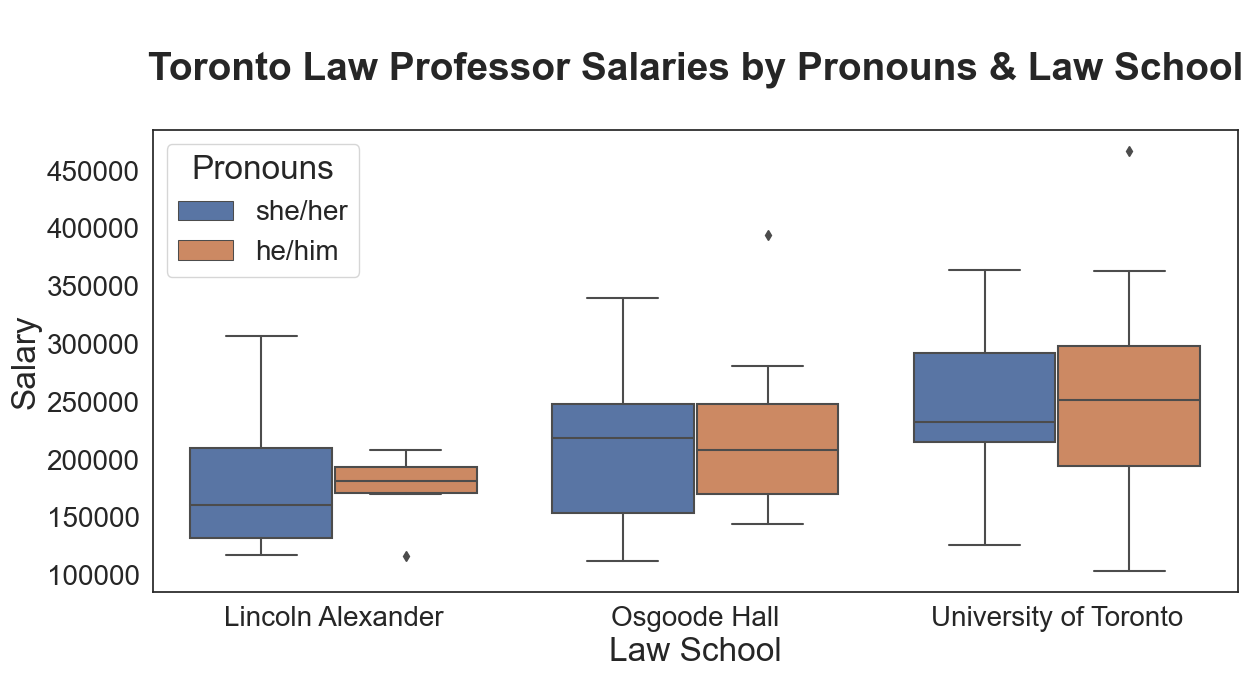

In [13]:
# graph the distribution of salaries for each pronoun, broken down by university
sns.set_theme(style="white")
university_order = df_pronouns['university'].sort_values().unique()
ax = sns.boxplot(x="university", y="Salary", hue="pronouns", data=df_pronouns, order=university_order)
ax.set_title('\nToronto Law Professor Salaries by Pronouns & Law School\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Law School', fontsize=24)
ax.set_ylabel('Salary', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(14, 6)
ax.legend(title='Pronouns', fontsize=20, title_fontsize=24)
plt.show()

### Data validation

In [9]:
df_merged[df_merged['university']== 'Osgoode Hall'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns
21,Steven Hoffman,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Dr. Steven J. Hoffman is the Dahdaleh Distingu...,Professor / Canada Research Chair,393706.24,he/him
37,Lisa Philipps,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Lisa Philipps teaches and writes abo...,Provost and Vice President Academic / Professor,339999.92,she/her
9,Mary G. Condon,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Mary Condon was appointed Dean of Osgoode Hall...,Dean / Professor,322832.40,she/her
25,Jinyan Li,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Jinyan Li is Professor of Tax Law and former I...,Professor,290030.97,she/her
22,Allan C. Hutchinson,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,"A member of Osgoode’s faculty since 1982, Prof...",Professor,280734.71,he/him
39,Poonam Puri,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Poonam Puri is an internationally re...,Professor / Course Director,274011.45,she/her
17,Benjamin Geva,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Dr. Benjamin Geva is a Professor of Law at Osg...,Professor,271502.64,he/him
16,Trevor C. W. Farrow,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Research. Professor Farrow is internationally ...,Professor,270242.91,he/him
18,Philip Girard,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,Philip Girard joined the faculty of Osgoode Ha...,Professor,261871.21,he/him
43,Craig M. Scott,Osgoode Hall,https://www.osgoode.yorku.ca/faculty-and-staff...,"As of July 2021, Professor Craig Scott is serv...",Associate Dean / Professor,260568.27,he/him


In [10]:
df_merged[df_merged['university']== 'Lincoln Alexander'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns
120,Donna Young,Lincoln Alexander,https://www.torontomu.ca/law/about/our-dean/,Donna E. Young is the Founding Dean of the Lin...,Dean,306884.04,she/her
116,Pnina Alon-Shenker,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Pnina Alon-Shenker is an associate professor i...,Associate Professor,218323.40,she/her
114,Avner Levin,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Avner Levin is a professor at Toronto Metropol...,Professor,208227.48,he/him
110,Sari Graben,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Sari Graben’s teaching and research focuses on...,Associate Dean Research and Graduate Studies,206669.39,she/her
115,Asher Alkoby,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Asher Alkoby is an associate professor in the ...,Associate Professor,195318.40,he/him
117,Timothy J. Bartkiw,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Timothy J. Bartkiw is an associate professor i...,Associate Professor,187631.46,he/him
119,Alexandra Orlova,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Alexandra Orlova received her PhD in law from ...,Professor,175599.41,she/her
118,Gil Lan,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Gil Lan is an associate professor in the Linco...,Associate Professor,174307.78,he/him
112,Graham Hudson,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Graham Hudson is an Associate Professor and As...,Associate Dean,170246.16,he/him
107,Idil Atak,Lincoln Alexander,https://www.torontomu.ca/law/faculty-and-resea...,Dr. Idil Atak is an associate professor at the...,Chair Criminology,145694.75,she/her


In [11]:

df_merged[df_merged['university']== 'University of Toronto'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns
66,Alexander Dyck,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Professor of Finance and Economic Analysis and...,Professor of Finance,466599.00,he/him
58,Jutta Brunnée,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,"Dean, University Professor & James Marshall To...",Dean and Professor of Law,363826.50,she/her
74,Edward Iacobucci,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Professor & TSE Chair in Capital Markets Jackm...,"Professor of Law and Dean, Faculty of Law",363082.48,he/him
91,Cheryl Regehr,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Vice-President and Provost Simcoe Hall 27 King...,"Vice President and Provost; Professor, Factor-...",358000.02,she/her
92,Arthur Ripstein,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,"Professor of Law and Philosophy, University Pr...",Professor of Law and cross-appointed to Philos...,354357.42,he/him
94,Kent Roach,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Professor Jackman Law BuildingRoom J446 78 Que...,Professor of Law,345612.54,he/him
105,Stephen Waddams,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Professor Jackman Law Building78 Queen's ParkT...,Professor of Law,334294.98,he/him
78,Brian Langille,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Professor Jackman Law BuildingRoom J45478 Quee...,Professor of Law,327335.04,he/him
73,Gillian Hadfield,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,Schwartz Reisman Chair in Technology and Socie...,Professor of Law,326412.92,she/her
67,David Dyzenhaus,University of Toronto,https://www.law.utoronto.ca/faculty-staff/full...,University Professor of Law and Philosophy and...,Professor of Law and cross-appointed to Philos...,318360.26,he/him


In [12]:
# Show professors in df but not df_merged
df[~df['name'].isin(df_merged['name'])]

,faculty,name,title,email,href,bio,university,name_simple,last_name,first_name
0,osgoode,Rabiat Akande,Assistant Professor,rakande@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Rabiat Akande works in the fields of...,York University,Rabiat Akande,akande,rabiat
1,osgoode,Harry Arthurs,Professor Emeritus,harthurs@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,"University Professor, former Dean of Osgoode H...",York University,Harry Arthurs,arthurs,harry
11,osgoode,Suzanne Chiodo,Assistant Professor,schiodo@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Suzanne Chiodo’s areas of teaching a...,York University,Suzanne Chiodo,chiodo,suzanne
12,osgoode,Barnali Choudhury,"Professor and Director, Jack & Mae Nathanson C...",bchoudhury@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Barnali Choudhury is a Professor of Law and th...,York University,Barnali Choudhury,choudhury,barnali
16,osgoode,Signa A. Daum Shanks,Associate Professor,sdaumshanks@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Signa A. Daum Shanks started at Osgoode in 201...,York University,Signa A Daum Shanks,shanks,signa
17,osgoode,Valerio De Stefano,Canada Research Chair in Innovation Law and So...,vdestefano@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,"Professor Valerio De Stefano, PhD, joined Osgo...",York University,Valerio De Stefano,stefano,valerio
23,osgoode,Shelley A. M. Gavigan,Professor Emerita,sgavigan@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Shelley Gavigan is Professor Emerita and Senio...,York University,Shelley A M Gavigan,gavigan,shelley
25,osgoode,Joan M. Gilmour,Professor Emerita,jgilmour@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Gilmour joined Osgoode Hall Law Scho...,York University,Joan M Gilmour,gilmour,joan
28,osgoode,Douglas C. Hay,Professor Emeritus,dhay@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Emeritus Douglas Hay was cross-appoi...,York University,Douglas C Hay,hay,douglas
32,osgoode,Shin Imai,Professor Emeritus,simai@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,"After he became a lawyer in 1980, Shin Imai pr...",York University,Shin Imai,imai,shin
